In [514]:
import pandas as pd
import numpy as np
from random import randint
import operator
##! conda install scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.calibration import CalibratedClassifierCV
from mlxtend.feature_selection import ColumnSelector
from mlxtend.evaluate import feature_importance_permutation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.decomposition import PCA
df2 = pd.read_csv("https://raw.githubusercontent.com/brusso115/NCAA-March-Madness-Model/master/Data-Cleaning/data_cleaned.csv")
try:
    df2 = df2.drop(["Unnamed: 0"],axis=1)
except:
    next
try:
    df2 = df2.drop(["Unnamed: 0.1"],axis=1)
except:
    next

## Data Cleaning

## Preprocessing

In [516]:
X = df2.iloc[:,4:]
y = df2["W"]
del X["Tconf"]
del X["Oconf"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    shuffle=True, stratify=y)

## Feature Selection

In [360]:
importances = {}
for d in X_train.columns:
    importances[d] = 0

Test Accuracy 75.95%
feature: seed_diff, importance: 0.801
feature: WP_diff, importance: 0.711
feature: com_diff, importance: 0.524
feature: Scorediff, importance: 0.497
feature: FGMdiff, importance: 0.320
feature: FGAdiff, importance: 0.315
feature: FGM3diff, importance: 0.308
feature: FGA3diff, importance: 0.293
feature: FTMdiff, importance: 0.278
feature: FTAdiff, importance: 0.238
feature: ORdiff, importance: 0.202
feature: DRdiff, importance: 0.183
feature: Astdiff, importance: 0.143
feature: TOdiff, importance: 0.094
feature: Stldiff, importance: 0.080
feature: Blkdiff, importance: 0.029
feature: PFdiff, importance: 0.012
feature: rank_diff, importance: 0.001


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.5533032703151457, -0.5414603373062068, -0....",-0.564791,"(seed_diff,)",0.0243723,0.0241903,0.0120951
2,"(0, 17)","[-0.5535388932032428, -0.5347940702001768, -0....",-0.562527,"(seed_diff, rank_diff)",0.0249335,0.0247473,0.0123737
3,"(0, 4, 17)","[-0.5490728581282767, -0.5343427602706251, -0....",-0.561587,"(seed_diff, FGMdiff, rank_diff)",0.0271906,0.0269876,0.0134938
4,"(0, 3, 4, 17)","[-0.5459002196015096, -0.5308480394940662, -0....",-0.559517,"(seed_diff, Scorediff, FGMdiff, rank_diff)",0.0279367,0.0277281,0.013864
5,"(0, 3, 4, 12, 17)","[-0.5470224931167341, -0.5289205297015225, -0....",-0.558504,"(seed_diff, Scorediff, FGMdiff, Astdiff, rank_...",0.0272088,0.0270056,0.0135028
6,"(0, 3, 4, 11, 12, 17)","[-0.5444921571597015, -0.5262706421880721, -0....",-0.558922,"(seed_diff, Scorediff, FGMdiff, DRdiff, Astdif...",0.0317124,0.0314755,0.0157378
7,"(0, 3, 4, 11, 12, 15, 17)","[-0.5452171273504939, -0.5295177024647736, -0....",-0.55872,"(seed_diff, Scorediff, FGMdiff, DRdiff, Astdif...",0.0309412,0.0307101,0.0153551
8,"(0, 3, 4, 11, 12, 13, 15, 17)","[-0.5430858514175462, -0.5245525037485974, -0....",-0.558642,"(seed_diff, Scorediff, FGMdiff, DRdiff, Astdif...",0.0367532,0.0364787,0.0182394
9,"(0, 1, 3, 4, 11, 12, 13, 15, 17)","[-0.5439044476254347, -0.5249151674915008, -0....",-0.558929,"(seed_diff, WP_diff, Scorediff, FGMdiff, DRdif...",0.0368068,0.036532,0.018266
10,"(0, 1, 3, 4, 10, 11, 12, 13, 15, 17)","[-0.5406359456956313, -0.5275749562658325, -0....",-0.559053,"(seed_diff, WP_diff, Scorediff, FGMdiff, ORdif...",0.0381025,0.037818,0.018909


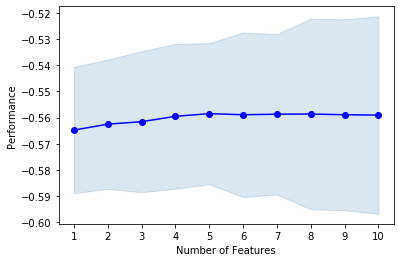

In [409]:
# Find best features for Logistic Regression

pipe = make_pipeline(StandardScaler(),
                     LogisticRegression())

pipe.fit(X_train, y_train)
print('Test Accuracy %.2f%%' % (100*pipe.score(X_test, y_test)))
lr_model = pipe.named_steps.logisticregression

for feat, importance in zip(X_train.columns, reversed(np.sort(np.abs(lr_model.coef_[0])))):
    print('feature: %s, importance: %.3f' % (feat, importance))
    importances[feat] += importance
    
sfs1 = SFS(pipe, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='neg_log_loss',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T

Test Accuracy 70.25%
feature: seed_diff, importance: 0.072
feature: WP_diff, importance: 0.047
feature: com_diff, importance: 0.037
feature: Scorediff, importance: 0.034
feature: FGMdiff, importance: 0.034
feature: FGAdiff, importance: 0.033
feature: FGM3diff, importance: 0.032
feature: FGA3diff, importance: 0.028
feature: FTMdiff, importance: 0.028
feature: FTAdiff, importance: 0.022
feature: ORdiff, importance: 0.022
feature: DRdiff, importance: 0.020
feature: Astdiff, importance: 0.018
feature: TOdiff, importance: 0.016
feature: Stldiff, importance: 0.016
feature: Blkdiff, importance: 0.016
feature: PFdiff, importance: 0.015
feature: rank_diff, importance: 0.011


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.5616292832229601, -0.5448270568376403, -0....",-0.576277,"(seed_diff,)",0.0302117,0.0299861,0.0149931
2,"(0, 16)","[-0.5415824178077958, -0.5278497950843469, -0....",-0.558109,"(seed_diff, PFdiff)",0.0259377,0.025744,0.012872
3,"(0, 5, 16)","[-0.5287939582362969, -0.5522240958315494, -0....",-0.561652,"(seed_diff, FGAdiff, PFdiff)",0.019221,0.0190775,0.00953874
4,"(0, 5, 14, 16)","[-0.5243980964621354, -0.5576221824477308, -0....",-0.565618,"(seed_diff, FGAdiff, Stldiff, PFdiff)",0.0269884,0.0267868,0.0133934
5,"(0, 4, 5, 14, 16)","[-0.5091344302939236, -0.5586699478649045, -0....",-0.560671,"(seed_diff, FGMdiff, FGAdiff, Stldiff, PFdiff)",0.0278285,0.0276206,0.0138103
6,"(0, 4, 5, 14, 16, 17)","[-0.5118435391990802, -0.5566603848550956, -0....",-0.566748,"(seed_diff, FGMdiff, FGAdiff, Stldiff, PFdiff,...",0.0343637,0.0341071,0.0170536
7,"(0, 3, 4, 5, 14, 16, 17)","[-0.5326383153328113, -0.5503844803487655, -0....",-0.566031,"(seed_diff, Scorediff, FGMdiff, FGAdiff, Stldi...",0.0312025,0.0309695,0.0154847
8,"(0, 3, 4, 5, 14, 15, 16, 17)","[-0.5242060651103788, -0.5499007512371457, -0....",-0.56541,"(seed_diff, Scorediff, FGMdiff, FGAdiff, Stldi...",0.031809,0.0315715,0.0157857
9,"(0, 3, 4, 5, 9, 14, 15, 16, 17)","[-0.5388246463932962, -0.5545441253391745, -0....",-0.567571,"(seed_diff, Scorediff, FGMdiff, FGAdiff, FTAdi...",0.0236705,0.0234938,0.0117469
10,"(0, 3, 4, 5, 9, 12, 14, 15, 16, 17)","[-0.5444662948360808, -0.563484811139729, -0.6...",-0.570064,"(seed_diff, Scorediff, FGMdiff, FGAdiff, FTAdi...",0.0242169,0.0240361,0.012018


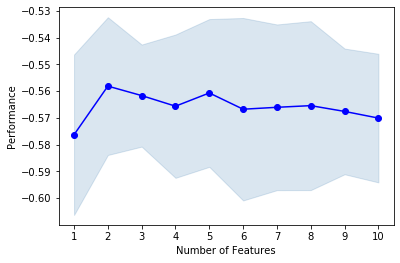

In [362]:
# Find best features for KNN

pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=20))

pipe.fit(X_train, y_train)
print('Test Accuracy %.2f%%' % (100*pipe.score(X_test, y_test)))

imp_vals, _ = feature_importance_permutation(
    predict_method=pipe.predict, 
    X=X_test.values,
    y=y_test,
    metric='accuracy',
    num_rounds=100,
    seed=1)
for feat, importance in zip(X_train.columns, reversed(np.sort(np.abs(imp_vals)))):
    print('feature: %s, importance: %.3f' % (feat, importance))
    importances[feat] += importance
    
sfs1 = SFS(pipe, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='neg_log_loss',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T

Test Accuracy 69.62%
feature: seed_diff, importance: 0.149
feature: WP_diff, importance: 0.113
feature: com_diff, importance: 0.060
feature: Scorediff, importance: 0.057
feature: FGMdiff, importance: 0.056
feature: FGAdiff, importance: 0.053
feature: FGM3diff, importance: 0.052
feature: FGA3diff, importance: 0.052
feature: FTMdiff, importance: 0.049
feature: FTAdiff, importance: 0.048
feature: ORdiff, importance: 0.046
feature: DRdiff, importance: 0.044
feature: Astdiff, importance: 0.042
feature: TOdiff, importance: 0.040
feature: Stldiff, importance: 0.040
feature: Blkdiff, importance: 0.039
feature: PFdiff, importance: 0.038
feature: rank_diff, importance: 0.021


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.5456106878869708, -0.5522951183917855, -0....",-0.572424,"(seed_diff,)",0.0355801,0.0353144,0.0176572
2,"(0, 10)","[-0.8888815892235867, -0.9196430768815727, -0....",-0.8791,"(seed_diff, ORdiff)",0.0536956,0.0532946,0.0266473
3,"(0, 10, 16)","[-0.6090322115334129, -0.5522666604731622, -0....",-0.60895,"(seed_diff, ORdiff, PFdiff)",0.0307776,0.0305478,0.0152739
4,"(0, 10, 16, 17)","[-0.5524952176465642, -0.5416774602281227, -0....",-0.580474,"(seed_diff, ORdiff, PFdiff, rank_diff)",0.0389306,0.0386398,0.0193199
5,"(0, 10, 14, 16, 17)","[-0.5405462913694634, -0.5714688970896904, -0....",-0.569602,"(seed_diff, ORdiff, Stldiff, PFdiff, rank_diff)",0.0378128,0.0375304,0.0187652
6,"(0, 10, 12, 14, 16, 17)","[-0.5242404034194725, -0.5669392526843521, -0....",-0.565076,"(seed_diff, ORdiff, Astdiff, Stldiff, PFdiff, ...",0.0360958,0.0358263,0.0179131
7,"(0, 10, 11, 12, 14, 16, 17)","[-0.5135933382390366, -0.5593098050006005, -0....",-0.559838,"(seed_diff, ORdiff, DRdiff, Astdiff, Stldiff, ...",0.0372866,0.0370081,0.0185041
8,"(0, 10, 11, 12, 14, 15, 16, 17)","[-0.5124369305060736, -0.5734491798090967, -0....",-0.561428,"(seed_diff, ORdiff, DRdiff, Astdiff, Stldiff, ...",0.0382156,0.0379302,0.0189651
9,"(0, 4, 10, 11, 12, 14, 15, 16, 17)","[-0.5381503929701246, -0.5652319942046884, -0....",-0.568089,"(seed_diff, FGMdiff, ORdiff, DRdiff, Astdiff, ...",0.0242637,0.0240825,0.0120413
10,"(0, 4, 6, 10, 11, 12, 14, 15, 16, 17)","[-0.5394758427645969, -0.5489703018485961, -0....",-0.563317,"(seed_diff, FGMdiff, FGM3diff, ORdiff, DRdiff,...",0.0270064,0.0268047,0.0134023


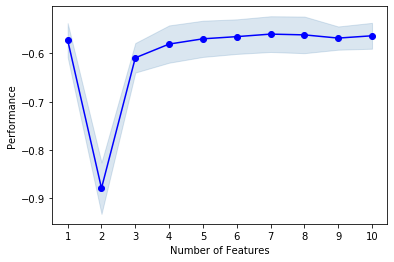

In [363]:
# Find best features for Random Forest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print('Test Accuracy %.2f%%' % (100*rf.score(X_test, y_test)))
for feat, importance in zip(X_train.columns, reversed(np.sort(rf.feature_importances_))):
    print('feature: %s, importance: %.3f' % (feat, importance))
    importances[feat] += importance
    
sfs1 = SFS(rf, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='neg_log_loss',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T

Test Accuracy 67.72%
feature: seed_diff, importance: 0.440
feature: WP_diff, importance: 0.160
feature: com_diff, importance: 0.120
feature: Scorediff, importance: 0.100
feature: FGMdiff, importance: 0.080
feature: FGAdiff, importance: 0.020
feature: FGM3diff, importance: 0.020
feature: FGA3diff, importance: 0.020
feature: FTMdiff, importance: 0.020
feature: FTAdiff, importance: 0.020
feature: ORdiff, importance: 0.000
feature: DRdiff, importance: 0.000
feature: Astdiff, importance: 0.000
feature: TOdiff, importance: 0.000
feature: Stldiff, importance: 0.000
feature: Blkdiff, importance: 0.000
feature: PFdiff, importance: 0.000
feature: rank_diff, importance: 0.000


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.6s finished

[2019-11-20 13:39:02] Features: 1/10 -- score: -0.6101428399297651[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.7s finished

[2019-11-20 13:39:08] Features: 2/10 -- score: -0.6142272670294515[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.7s finished

[2019-11-20 13:39:14] Features: 3/10 -- score: -0.6150443570788541[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.6019465594884914, -0.6152591208335758, -0....",-0.610143,"(seed_diff,)",0.0135189,0.013418,0.00670898
2,"(0, 17)","[-0.6057074276171938, -0.6177487500062746, -0....",-0.614227,"(seed_diff, rank_diff)",0.0120973,0.0120069,0.00600346
3,"(0, 1, 17)","[-0.6091784146039556, -0.6181580945309588, -0....",-0.615044,"(seed_diff, WP_diff, rank_diff)",0.0125098,0.0124163,0.00620817
4,"(0, 1, 3, 17)","[-0.6093696828808074, -0.6185827578967722, -0....",-0.615427,"(seed_diff, WP_diff, Scorediff, rank_diff)",0.0124062,0.0123135,0.00615676
5,"(0, 1, 2, 3, 17)","[-0.6092583348753071, -0.6201129413397826, -0....",-0.61575,"(seed_diff, WP_diff, com_diff, Scorediff, rank...",0.0125564,0.0124626,0.00623132
6,"(0, 1, 2, 3, 16, 17)","[-0.604133113203382, -0.6166982822424402, -0.6...",-0.616609,"(seed_diff, WP_diff, com_diff, Scorediff, PFdi...",0.0153777,0.0152628,0.00763142
7,"(0, 1, 2, 3, 6, 16, 17)","[-0.6063873945248967, -0.6166166199849344, -0....",-0.618346,"(seed_diff, WP_diff, com_diff, Scorediff, FGM3...",0.013258,0.0131589,0.00657947
8,"(0, 1, 2, 3, 6, 7, 16, 17)","[-0.6063873945248965, -0.6168386890518618, -0....",-0.619752,"(seed_diff, WP_diff, com_diff, Scorediff, FGM3...",0.012262,0.0121704,0.0060852
9,"(0, 1, 2, 3, 4, 6, 7, 16, 17)","[-0.6127108685119124, -0.6165313944420346, -0....",-0.620593,"(seed_diff, WP_diff, com_diff, Scorediff, FGMd...",0.0110149,0.0109327,0.00546633
10,"(0, 1, 2, 3, 4, 6, 7, 12, 16, 17)","[-0.6137728380665642, -0.6202513905612609, -0....",-0.623334,"(seed_diff, WP_diff, com_diff, Scorediff, FGMd...",0.0128036,0.012708,0.00635399


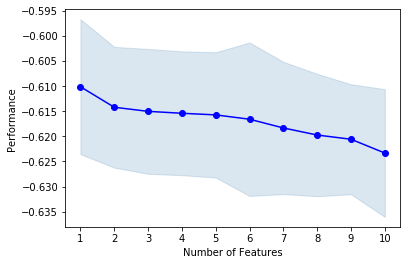

In [364]:
# Find best features for AdaBoost

boostada = AdaBoostClassifier(learning_rate=.1,n_estimators=50)
boostada.fit(X_train, y_train)
print('Test Accuracy %.2f%%' % (100*boostada.score(X_test, y_test)))
for feat, importance in zip(X_train.columns, reversed(np.sort(boostada.feature_importances_))):
    print('feature: %s, importance: %.3f' % (feat, importance))
    importances[feat] += importance
    
sfs1 = SFS(boostada, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_log_loss',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T

Test Accuracy 68.35%
feature: seed_diff, importance: 0.417
feature: WP_diff, importance: 0.077
feature: com_diff, importance: 0.056
feature: Scorediff, importance: 0.053
feature: FGMdiff, importance: 0.044
feature: FGAdiff, importance: 0.041
feature: FGM3diff, importance: 0.041
feature: FGA3diff, importance: 0.038
feature: FTMdiff, importance: 0.038
feature: FTAdiff, importance: 0.030
feature: ORdiff, importance: 0.028
feature: DRdiff, importance: 0.025
feature: Astdiff, importance: 0.023
feature: TOdiff, importance: 0.023
feature: Stldiff, importance: 0.021
feature: Blkdiff, importance: 0.021
feature: PFdiff, importance: 0.013
feature: rank_diff, importance: 0.011


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    6.1s finished

[2019-11-20 13:41:05] Features: 1/10 -- score: -0.5720869577139409[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    5.8s finished

[2019-11-20 13:41:11] Features: 2/10 -- score: -0.5801421315644696[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    5.7s finished

[2019-11-20 13:41:17] Features: 3/10 -- score: -0.5745888997820785[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.5456874144709292, -0.5546342518026659, -0....",-0.572087,"(seed_diff,)",0.0363547,0.0360832,0.0180416
2,"(0, 13)","[-0.5987253714398895, -0.5666582954981694, -0....",-0.580142,"(seed_diff, TOdiff)",0.044231,0.0439007,0.0219504
3,"(0, 2, 13)","[-0.5815593638376423, -0.5552486088196477, -0....",-0.574589,"(seed_diff, com_diff, TOdiff)",0.0329397,0.0326937,0.0163468
4,"(0, 2, 7, 13)","[-0.5573765555297456, -0.5675749089869249, -0....",-0.582496,"(seed_diff, com_diff, FGA3diff, TOdiff)",0.0281964,0.0279858,0.0139929
5,"(0, 2, 7, 10, 13)","[-0.56633526144068, -0.5777489879183427, -0.60...",-0.589256,"(seed_diff, com_diff, FGA3diff, ORdiff, TOdiff)",0.0272014,0.0269982,0.0134991
6,"(0, 2, 7, 10, 11, 13)","[-0.5463828345973193, -0.5775008290683319, -0....",-0.585036,"(seed_diff, com_diff, FGA3diff, ORdiff, DRdiff...",0.0272851,0.0270813,0.0135407
7,"(0, 2, 7, 10, 11, 13, 16)","[-0.5506152104374904, -0.5732914197511498, -0....",-0.58669,"(seed_diff, com_diff, FGA3diff, ORdiff, DRdiff...",0.0295117,0.0292913,0.0146457
8,"(0, 2, 3, 7, 10, 11, 13, 16)","[-0.5387086560654389, -0.569664128543191, -0.5...",-0.581285,"(seed_diff, com_diff, Scorediff, FGA3diff, ORd...",0.0251,0.0249126,0.0124563
9,"(0, 2, 3, 7, 10, 11, 12, 13, 16)","[-0.5485371527902075, -0.5695968762724608, -0....",-0.581744,"(seed_diff, com_diff, Scorediff, FGA3diff, ORd...",0.0272616,0.027058,0.013529
10,"(0, 2, 3, 6, 7, 10, 11, 12, 13, 16)","[-0.5502986215879427, -0.569319991349105, -0.6...",-0.585878,"(seed_diff, com_diff, Scorediff, FGM3diff, FGA...",0.025204,0.0250158,0.0125079


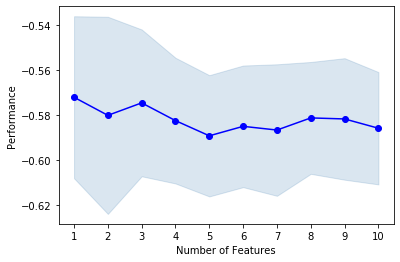

In [365]:
# Find best features for Gradient Boost

boostgrad = GradientBoostingClassifier(learning_rate=.1)
boostgrad.fit(X_train, y_train)
print('Test Accuracy %.2f%%' % (100*boostgrad.score(X_test, y_test)))
for feat, importance in zip(X_train.columns, reversed(np.sort(boostgrad.feature_importances_))):
    print('feature: %s, importance: %.3f' % (feat, importance))
    importances[feat] += importance
    
sfs1 = SFS(boostgrad, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_log_loss',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.553675781383222, -0.5396899656052885, -0.5...",-0.565278,"(seed_diff,)",0.0263772,0.0261802,0.0130901
2,"(0, 14)","[-0.5499213925763436, -0.5378307855614358, -0....",-0.565386,"(seed_diff, Stldiff)",0.0311053,0.030873,0.0154365
3,"(0, 9, 14)","[-0.5499854871555643, -0.541339127381199, -0.5...",-0.566764,"(seed_diff, FTAdiff, Stldiff)",0.0305336,0.0303056,0.0151528
4,"(0, 7, 9, 14)","[-0.551664707287027, -0.5424935031092482, -0.5...",-0.568213,"(seed_diff, FGA3diff, FTAdiff, Stldiff)",0.0301929,0.0299674,0.0149837
5,"(0, 7, 9, 13, 14)","[-0.5523450661068858, -0.5251483304158229, -0....",-0.570071,"(seed_diff, FGA3diff, FTAdiff, TOdiff, Stldiff)",0.0457233,0.0453818,0.0226909
6,"(0, 7, 9, 10, 13, 14)","[-0.5407923453004165, -0.5407593201754561, -0....",-0.568995,"(seed_diff, FGA3diff, FTAdiff, ORdiff, TOdiff,...",0.0475582,0.047203,0.0236015
7,"(0, 7, 8, 9, 10, 13, 14)","[-0.5405193809943318, -0.5456782333207932, -0....",-0.570731,"(seed_diff, FGA3diff, FTMdiff, FTAdiff, ORdiff...",0.0469001,0.0465499,0.0232749
8,"(0, 1, 7, 8, 9, 10, 13, 14)","[-0.5521345571889797, -0.5299832286942332, -0....",-0.573349,"(seed_diff, WP_diff, FGA3diff, FTMdiff, FTAdif...",0.0504026,0.0500262,0.0250131
9,"(0, 1, 6, 7, 8, 9, 10, 13, 14)","[-0.5584665131206299, -0.5282575641915419, -0....",-0.576816,"(seed_diff, WP_diff, FGM3diff, FGA3diff, FTMdi...",0.0489077,0.0485425,0.0242712
10,"(0, 1, 6, 7, 8, 9, 10, 13, 14, 16)","[-0.5871845397816912, -0.5132356465532558, -0....",-0.580999,"(seed_diff, WP_diff, FGM3diff, FGA3diff, FTMdi...",0.0526043,0.0522114,0.0261057


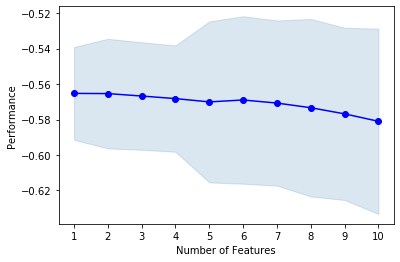

In [403]:
# Find best features for Naive Bayes

nb = GaussianNB()

sfs1 = SFS(nb, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='neg_log_loss',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T

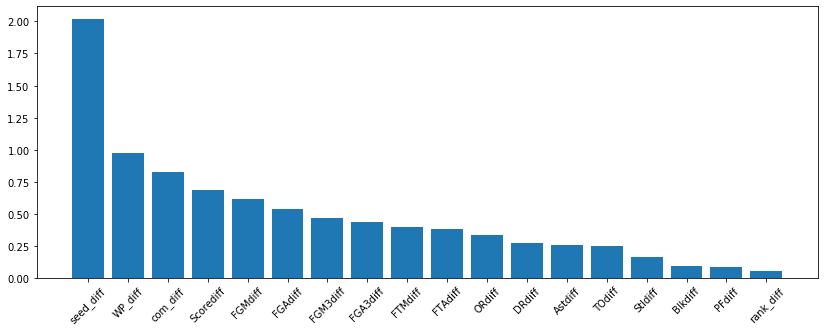

In [367]:
# Chart of cumulative feature importances

sorted_x = sorted(importances.items(), key=operator.itemgetter(1));
x,y = zip(*reversed(sorted_x));
plt.figure(figsize=(14, 5));
plt.bar(x,y);
plt.xticks(rotation=45);

In [404]:
# Set best features for each model
lrfeat = (0, 3, 4, 11, 12, 13, 15, 17)
knnfeat = (0, 4, 5, 14, 16)
rffeat = (0, 10, 11, 12, 14, 16, 17)
adafeat = (0, 1, 2, 3, 17)
gradfeat = (0, 2, 13)
nbfeat = (0, 7, 9, 13, 14)

In [436]:
X = df2.iloc[:,4:]
y = df2["W"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, stratify=y)

## Logistic Regression

Fold:  1, Class dist.: [422 378], Acc: 0.644, Loss: 0.579
Fold:  2, Class dist.: [422 379], Acc: 0.742, Loss: 0.525
Fold:  3, Class dist.: [422 379], Acc: 0.753, Loss: 0.539
Fold:  4, Class dist.: [422 379], Acc: 0.764, Loss: 0.512
Fold:  5, Class dist.: [422 379], Acc: 0.719, Loss: 0.529
Fold:  6, Class dist.: [422 379], Acc: 0.640, Loss: 0.566
Fold:  7, Class dist.: [422 379], Acc: 0.697, Loss: 0.585
Fold:  8, Class dist.: [422 379], Acc: 0.584, Loss: 0.657
Fold:  9, Class dist.: [422 379], Acc: 0.764, Loss: 0.544
Fold: 10, Class dist.: [423 379], Acc: 0.716, Loss: 0.566

CV accuracy: 0.702 +/- 0.058
CV Log Loss: 0.560 +/- 0.040


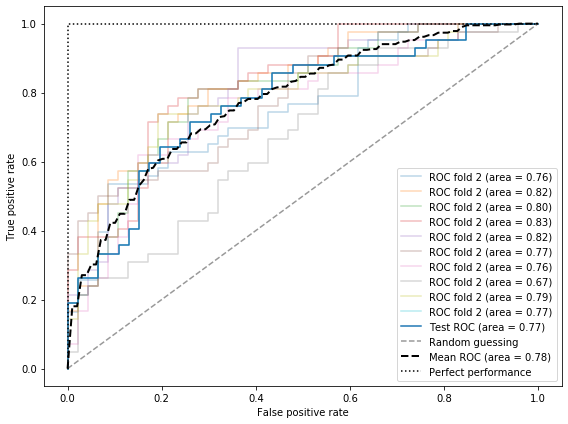

In [402]:
lr = make_pipeline(ColumnSelector(cols=(lrfeat)),
                         StandardScaler(),
                         CalibratedClassifierCV(base_estimator=LogisticRegression(),cv=5))

kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

fig = plt.figure(figsize=(8, 6))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    lr.fit(X_train.iloc[train], y_train.iloc[train])
    score = lr.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = lr.predict_proba(X_train.iloc[test])
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                     y_pred[:,1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    #############################################################
    ### TRAINING ROC CURVES
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc),alpha=0.3)
    #############################################################
    
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, Loss: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))

#############################################################
### TEST ROC CURVE
test_probas = lr.predict_proba(X_train.iloc[test])

fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                 test_probas[:, 1],
                                 pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr,
         tpr,
         label='Test ROC (area = %0.2f)'
               % (roc_auc))

#############################################################
### Plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

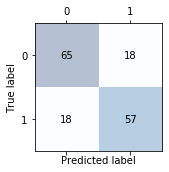

Test accuracy: 77.22%
Test Log Loss: 0.500


In [416]:
# confusion matrix and test results
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = lr.score(X_test, y_test)
y_probs = lr.predict_proba(X_test)[:,1]
loss = log_loss(y_test,y_probs)
print('Test accuracy: %.2f%%' % (score*100))
print('Test Log Loss: %0.3f' % (loss))

## KNN

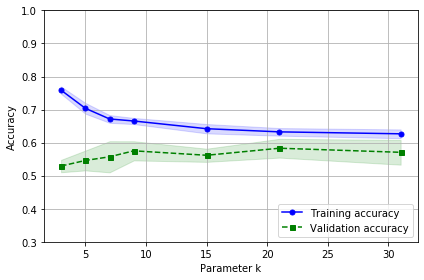

In [222]:
# n neighbors
param_range = [3, 5, 7, 9, 15, 21, 31]
train_scores, test_scores = validation_curve(
                estimator=pipe_knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter k')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

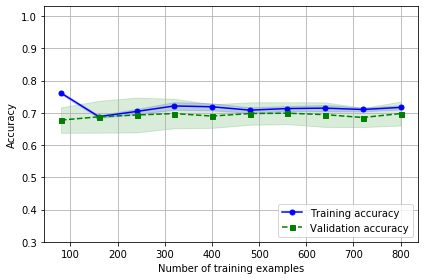

In [47]:
# number of training examples
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_knn,
                               X=X_train.values,
                               y=y_train.values,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.3, 1.03])
plt.tight_layout()
plt.savefig('06_05.png', dpi=300)
plt.show()

Fold:  1, Class dist.: [422 378], Acc: 0.611, Loss: 0.616
Fold:  2, Class dist.: [422 379], Acc: 0.685, Loss: 0.573
Fold:  3, Class dist.: [422 379], Acc: 0.652, Loss: 0.597
Fold:  4, Class dist.: [422 379], Acc: 0.697, Loss: 0.589
Fold:  5, Class dist.: [422 379], Acc: 0.652, Loss: 0.601
Fold:  6, Class dist.: [422 379], Acc: 0.584, Loss: 0.645
Fold:  7, Class dist.: [422 379], Acc: 0.629, Loss: 0.625
Fold:  8, Class dist.: [422 379], Acc: 0.528, Loss: 0.682
Fold:  9, Class dist.: [422 379], Acc: 0.629, Loss: 0.597
Fold: 10, Class dist.: [423 379], Acc: 0.693, Loss: 0.581

CV accuracy: 0.636 +/- 0.050
CV Log Loss: 0.611 +/- 0.031


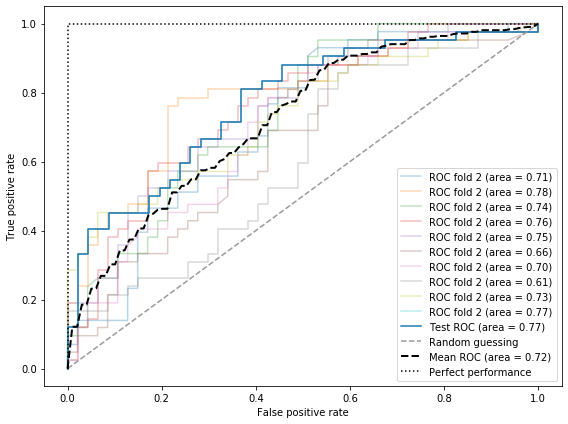

In [417]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.decomposition import PCA

pipe_knn = make_pipeline(ColumnSelector(cols=(knnfeat)),
                         StandardScaler(),
                         PCA(n_components=2),
                         CalibratedClassifierCV(base_estimator=KNeighborsClassifier(n_neighbors = 20),cv=5))

kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

fig = plt.figure(figsize=(8, 6))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    pipe_knn.fit(X_train.iloc[train], y_train.iloc[train])
    score = pipe_knn.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = pipe_knn.predict_proba(X_train.iloc[test])
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                     y_pred[:,1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    #############################################################
    ### TRAINING ROC CURVES
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc),alpha=0.3)
    #############################################################
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, Loss: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))
#############################################################
### TEST ROC CURVE
test_probas = pipe_knn.predict_proba(X_train.iloc[test])

fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                 test_probas[:, 1],
                                 pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr,
         tpr,
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################
### Plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

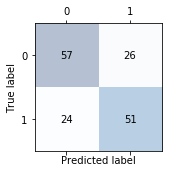

Test accuracy: 68.35%
Test Log Loss: 0.613


In [418]:
# confusion matrix and test results
from sklearn.metrics import confusion_matrix

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = pipe_knn.score(X_test, y_test)
y_probs = pipe_knn.predict_proba(X_test)[:,1]
loss = log_loss(y_test,y_probs)
print('Test accuracy: %.2f%%' % (score*100))
print('Test Log Loss: %0.3f' % (loss))

## Random Forest

Fold:  1, Class dist.: [372 334], Acc: 0.650, Loss: 0.624
Fold:  2, Class dist.: [372 334], Acc: 0.713, Loss: 0.547
Fold:  3, Class dist.: [372 335], Acc: 0.722, Loss: 0.549
Fold:  4, Class dist.: [372 335], Acc: 0.696, Loss: 0.572
Fold:  5, Class dist.: [373 335], Acc: 0.705, Loss: 0.596
Fold:  6, Class dist.: [373 335], Acc: 0.667, Loss: 0.577
Fold:  7, Class dist.: [373 335], Acc: 0.705, Loss: 0.576
Fold:  8, Class dist.: [373 335], Acc: 0.782, Loss: 0.561
Fold:  9, Class dist.: [373 335], Acc: 0.667, Loss: 0.634
Fold: 10, Class dist.: [373 335], Acc: 0.731, Loss: 0.570

CV accuracy: 0.704 +/- 0.036
CV Log Loss: 0.581 +/- 0.028


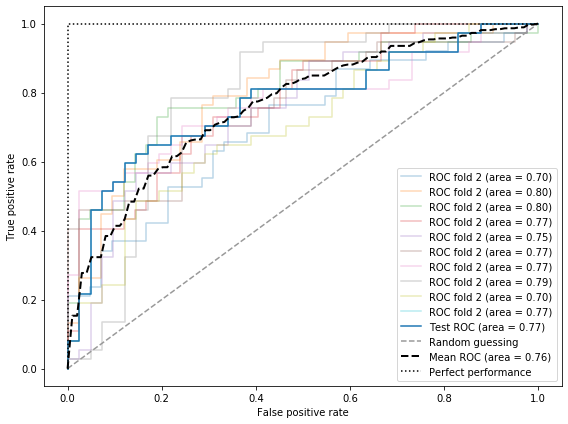

In [378]:
kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

pipe_rf = make_pipeline(ColumnSelector(cols=(rffeat)),
                        CalibratedClassifierCV(RandomForestClassifier(n_estimators=100)))

fig = plt.figure(figsize=(8, 6))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    pipe_rf.fit(X_train.iloc[train], y_train.iloc[train])
    score = pipe_rf.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = pipe_rf.predict_proba(X_train.iloc[test])
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                     y_pred[:,1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    #############################################################
    ### TRAINING ROC CURVES
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc),alpha=0.3)
    #############################################################
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, Loss: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))
#############################################################
### TEST ROC CURVE
test_probas = pipe_rf.predict_proba(X_train.iloc[test])

fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                 test_probas[:, 1],
                                 pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr,
         tpr,
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################
### Plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

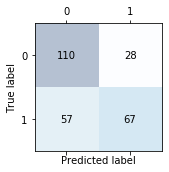

Test accuracy: 0.676
Test Log Loss: 0.613


NameError: name 'rf_df' is not defined

In [379]:
#confusion matrix and test results


y_pred = pipe_rf.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()


score = pipe_rf.score(X_test, y_test)
y_probs = pipe_rf.predict_proba(X_test)[:,1]
loss = log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))


import seaborn as sns

# plot nicely
x_index = np.unique(rf_df.loc[:,'min_sample_split'])
y_index = np.unique((rf_df.loc[:,'max_depth']))
a = pd.DataFrame(index = x_index, columns = y_index)

for i in x_index:
    for j in y_index:
        a.loc[i,j] = list(rf_df.loc[(rf_df['min_sample_split'] == i) & (rf_df['max_depth'] == j),'mean_r2'])[0]#.astype(float)
a = a.apply(pd.to_numeric)    
sns.heatmap(a)
plt.xlabel('max_depth')
plt.ylabel('min_samples_split')
plt.title('r2')
plt.show()


## Ensemble

### Bagging

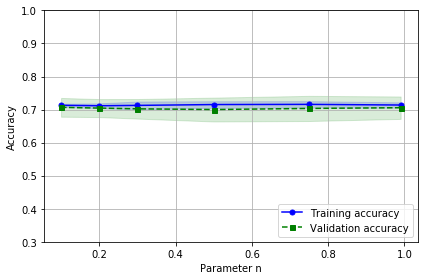

In [229]:
#bagging sample size
param_range = [.1, .2, .3, .5, .75,.99]
train_scores, test_scores = validation_curve(
                estimator=bag, 
                X=X_train, 
                y=y_train, 
                param_name='max_samples', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

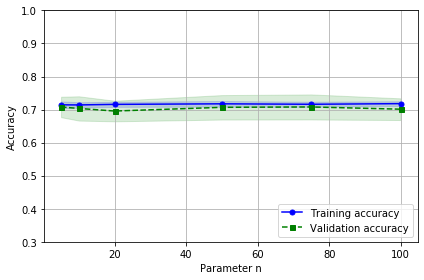

In [230]:
#bagging sample size
param_range = [5, 10, 20, 50, 75,100]
train_scores, test_scores = validation_curve(
                estimator=bag, 
                X=X_train, 
                y=y_train, 
                param_name='n_estimators', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

Fold:  1, Class dist.: [372 334], Acc: 0.637, Loss: 0.556
Fold:  2, Class dist.: [372 334], Acc: 0.750, Loss: 0.522
Fold:  3, Class dist.: [372 335], Acc: 0.810, Loss: 0.488
Fold:  4, Class dist.: [372 335], Acc: 0.734, Loss: 0.529
Fold:  5, Class dist.: [373 335], Acc: 0.705, Loss: 0.524
Fold:  6, Class dist.: [373 335], Acc: 0.667, Loss: 0.608
Fold:  7, Class dist.: [373 335], Acc: 0.654, Loss: 0.528
Fold:  8, Class dist.: [373 335], Acc: 0.769, Loss: 0.518
Fold:  9, Class dist.: [373 335], Acc: 0.603, Loss: 0.657
Fold: 10, Class dist.: [373 335], Acc: 0.718, Loss: 0.555

CV accuracy: 0.705 +/- 0.061
CV Log Loss: 0.548 +/- 0.047


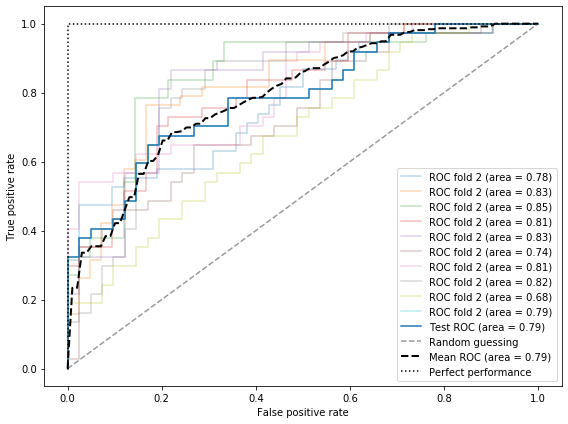

In [380]:
bag = BaggingClassifier(base_estimator = lr,n_estimators=20,max_samples=.75)

kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

fig = plt.figure(figsize=(8, 6))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    bag.fit(X_train.iloc[train], y_train.iloc[train])
    score = bag.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = bag.predict_proba(X_train.iloc[test])
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                     y_pred[:,1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    #############################################################
    ### TRAINING ROC CURVES
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc),alpha=0.3)
    #############################################################
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, Loss: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))
#############################################################
### TEST ROC CURVE
test_probas = bag.predict_proba(X_train.iloc[test])

fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                 test_probas[:, 1],
                                 pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr,
         tpr,
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################
### Plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

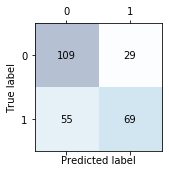

Test accuracy: 0.679
Test Log Loss: 0.600


In [381]:
#confusion matrix and test results
y_pred = bag.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = bag.score(X_test, y_test)
y_probs = bag.predict_proba(X_test)[:,1]
loss = log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))

### AdaBoost

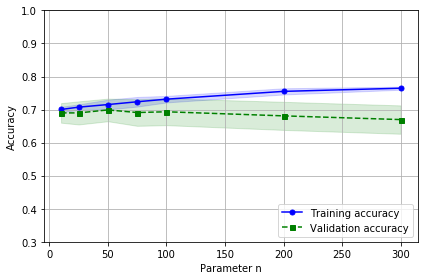

In [235]:
## n estimators
param_range = [10,25,50,75,100,200,300]
train_scores, test_scores = validation_curve(
                estimator=boostada, 
                X=X_train, 
                y=y_train, 
                param_name='n_estimators', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

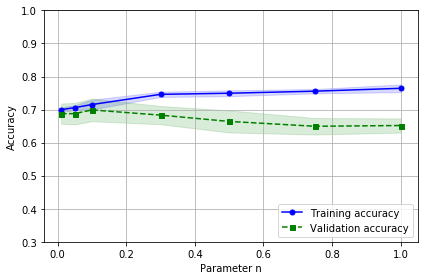

In [236]:
## learning rate
param_range = [.01,.05,.1, .3, .5,.75,1]
train_scores, test_scores = validation_curve(
                estimator=boostada, 
                X=X_train, 
                y=y_train, 
                param_name='learning_rate', 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter n')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

Fold:  1, Class dist.: [372 334], Acc: 0.650, Loss: 0.605
Fold:  2, Class dist.: [372 334], Acc: 0.750, Loss: 0.563
Fold:  3, Class dist.: [372 335], Acc: 0.785, Loss: 0.522
Fold:  4, Class dist.: [372 335], Acc: 0.658, Loss: 0.557
Fold:  5, Class dist.: [373 335], Acc: 0.692, Loss: 0.557
Fold:  6, Class dist.: [373 335], Acc: 0.641, Loss: 0.626
Fold:  7, Class dist.: [373 335], Acc: 0.679, Loss: 0.553
Fold:  8, Class dist.: [373 335], Acc: 0.782, Loss: 0.537
Fold:  9, Class dist.: [373 335], Acc: 0.654, Loss: 0.615
Fold: 10, Class dist.: [373 335], Acc: 0.692, Loss: 0.557

CV accuracy: 0.698 +/- 0.052
CV Log Loss: 0.569 +/- 0.033


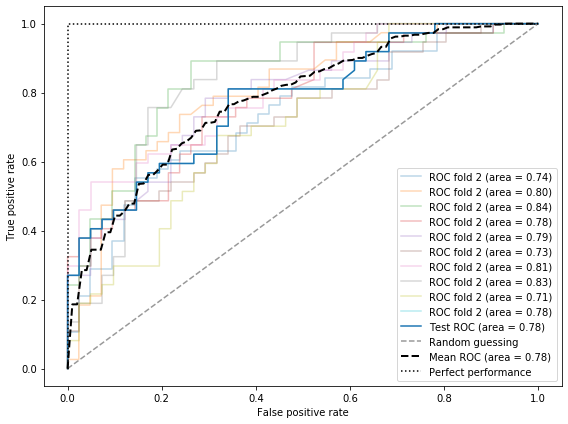

In [382]:
boostada = make_pipeline(ColumnSelector(cols=(adafeat)),
                         CalibratedClassifierCV(AdaBoostClassifier(learning_rate=.1,n_estimators=50)))

kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

fig = plt.figure(figsize=(8, 6))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    boostada.fit(X_train.iloc[train], y_train.iloc[train])
    score = boostada.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = boostada.predict_proba(X_train.iloc[test])
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                     y_pred[:,1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    #############################################################
    ### TRAINING ROC CURVES
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc),alpha=0.3)
    #############################################################
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, Loss: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))
#############################################################
### TEST ROC CURVE
test_probas = boostada.predict_proba(X_train.iloc[test])

fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                 test_probas[:, 1],
                                 pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr,
         tpr,
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################
### Plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

In [61]:
#feature importances
for feat, importance in zip(X_train.columns, reversed(np.sort(boostada.feature_importances_))):
    print('feature: %s, importance: %.3f' % (feat, importance))

feature: seed_diff, importance: 0.500
feature: WP_diff, importance: 0.120
feature: com_diff, importance: 0.100
feature: Scorediff, importance: 0.080
feature: FGMdiff, importance: 0.060
feature: Astdiff, importance: 0.040
feature: TOdiff, importance: 0.040
feature: Blkdiff, importance: 0.040
feature: PFdiff, importance: 0.020
feature: rank_diff, importance: 0.000


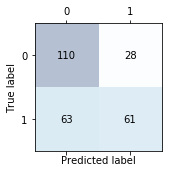

Test accuracy: 0.653
Test Log Loss: 0.592


In [383]:
#confustion matrix and test results
y_pred = boostada.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = boostada.score(X_test, y_test)
y_probs = boostada.predict_proba(X_test)[:,1]
loss = log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))

### Gradient Boost

Fold:  1, Class dist.: [372 334], Acc: 0.637, Loss: 0.617
Fold:  2, Class dist.: [372 334], Acc: 0.750, Loss: 0.560
Fold:  3, Class dist.: [372 335], Acc: 0.696, Loss: 0.556
Fold:  4, Class dist.: [372 335], Acc: 0.633, Loss: 0.575
Fold:  5, Class dist.: [373 335], Acc: 0.705, Loss: 0.600
Fold:  6, Class dist.: [373 335], Acc: 0.705, Loss: 0.585
Fold:  7, Class dist.: [373 335], Acc: 0.705, Loss: 0.572
Fold:  8, Class dist.: [373 335], Acc: 0.769, Loss: 0.556
Fold:  9, Class dist.: [373 335], Acc: 0.654, Loss: 0.627
Fold: 10, Class dist.: [373 335], Acc: 0.731, Loss: 0.572

CV accuracy: 0.699 +/- 0.043
CV Log Loss: 0.582 +/- 0.024


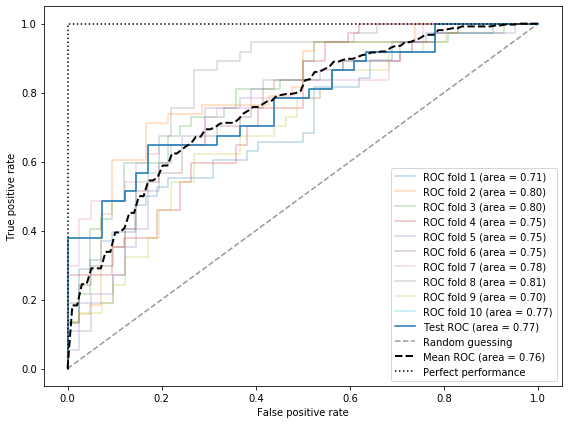

In [384]:
boostgrad = make_pipeline(ColumnSelector(cols=(gradfeat)),
                          CalibratedClassifierCV(GradientBoostingClassifier(learning_rate=.1)))

kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

fig = plt.figure(figsize=(8, 6))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    boostgrad.fit(X_train.iloc[train], y_train.iloc[train])
    score = boostgrad.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = boostgrad.predict_proba(X_train.iloc[test])
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                     y_pred[:,1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    #############################################################
    ### TRAINING ROC CURVES
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (k+1, roc_auc),alpha=0.3)
    #############################################################
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, Loss: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))
#############################################################
### TEST ROC CURVE
test_probas = boostgrad.predict_proba(X_train.iloc[test])

fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                 test_probas[:, 1],
                                 pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr,
         tpr,
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################
### Plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()

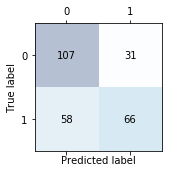

Test accuracy: 0.660
Test Log Loss: 0.599


In [385]:
#confustion matrix and test results
y_pred = boostgrad.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = boostgrad.score(X_test, y_test)
y_probs = boostgrad.predict_proba(X_test)[:,1]
loss =log_loss(y_test,y_probs)
print('Test accuracy: %0.3f' % (score))
print('Test Log Loss: %0.3f' % (loss))

### Stacking

In [405]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
import warnings

warnings.simplefilter('ignore')

clf1 = pipe_knn
clf2 = GradientBoostingClassifier(learning_rate=.1)
clf3 = AdaBoostClassifier(learning_rate=.1)
clf4 = pipe_rf
clf5 = bag
clf6 = CalibratedClassifierCV(GaussianNB())
clf7 = lr

lr_2 = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1,clf4,clf5,clf6,clf7], 
                          use_probas = True,
                          average_probas = True,
                          meta_classifier=lr_2)

for clf, label in zip([clf1,clf4,clf5,clf6,clf7,sclf], 
                      [
                          'KNN',
                          'Random Forest',
                          'Bagging',
                          'Gaussian',
                          'LR',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, scoring='accuracy')
    loss = model_selection.cross_val_score(clf, X, y, 
                                              cv=10, scoring='neg_log_loss')
    print("Accuracy: %0.4f (+/- %0.2f) Log Loss: %0.4f [%s]" 
          % (scores.mean(), scores.std(), loss.mean(), label))
    


Accuracy: 0.6869 (+/- 0.04) Log Loss: -0.5935 [KNN]
Accuracy: 0.6918 (+/- 0.05) Log Loss: -0.5908 [Random Forest]
Accuracy: 0.7089 (+/- 0.04) Log Loss: -0.5536 [Bagging]
Accuracy: 0.6935 (+/- 0.05) Log Loss: -0.5963 [Gaussian]
Accuracy: 0.7136 (+/- 0.04) Log Loss: -0.5497 [LR]
Accuracy: 0.7098 (+/- 0.04) Log Loss: -0.5753 [StackingClassifier]


Fold:  1, Class dist.: [396 357], Acc: 0.765, Loss: 0.499
Fold:  2, Class dist.: [397 357], Acc: 0.726, Loss: 0.533
Fold:  3, Class dist.: [397 357], Acc: 0.738, Loss: 0.619
Fold:  4, Class dist.: [397 357], Acc: 0.702, Loss: 0.608
Fold:  5, Class dist.: [397 357], Acc: 0.726, Loss: 0.565
Fold:  6, Class dist.: [397 357], Acc: 0.726, Loss: 0.547
Fold:  7, Class dist.: [397 357], Acc: 0.679, Loss: 0.599
Fold:  8, Class dist.: [397 358], Acc: 0.699, Loss: 0.566
Fold:  9, Class dist.: [397 358], Acc: 0.663, Loss: 0.582
Fold: 10, Class dist.: [397 358], Acc: 0.735, Loss: 0.581

CV accuracy: 0.716 +/- 0.029
CV Log Loss: 0.570 +/- 0.035


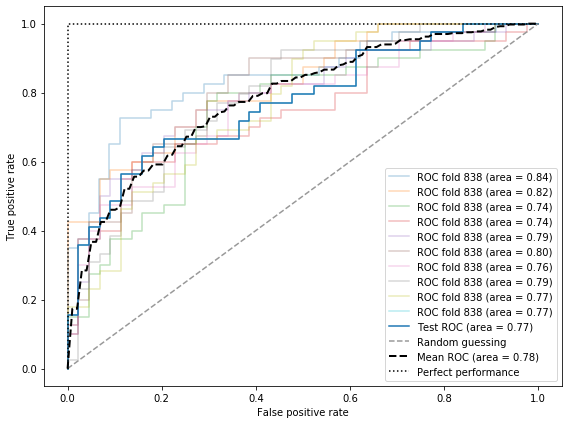

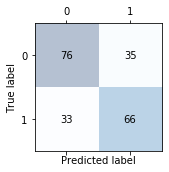

Test accuracy: 67.62
Test Log Loss: 0.614


In [513]:
kfold = StratifiedKFold(n_splits=10,
                        random_state=123).split(X_train, y_train)

sclf.fit(X_train,y_train)
fig = plt.figure(figsize=(8, 6))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
scores = []
losses = []
for k, (train, test) in enumerate(kfold):
    sclf.fit(X_train.iloc[train], y_train.iloc[train])
    score = sclf.score(X_train.iloc[test], y_train.iloc[test])
    scores.append(score)
    y_pred = sclf.predict_proba(X_train.iloc[test])
    fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                     y_pred[:,1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    #############################################################
    ### TRAINING ROC CURVES
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc),alpha=0.3)
    #############################################################
    loss = log_loss(y_train.iloc[test],y_pred)
    losses.append(loss)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f, Loss: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score, loss))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
print('CV Log Loss: %.3f +/- %.3f' % (np.mean(losses), np.std(losses)))
#############################################################
### TEST ROC CURVE
test_probas = sclf.predict_proba(X_train.iloc[test])

fpr, tpr, thresholds = roc_curve(y_train.iloc[test],
                                 test_probas[:, 1],
                                 pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr,
         tpr,
         label='Test ROC (area = %0.2f)'
               % (roc_auc))
#############################################################
### Plot
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()
y_pred = sclf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

score = sclf.score(X_test, y_test)
y_pred = sclf.predict(X_test)
y_probs = sclf.predict_proba(X_test)[:,1]
y_probs_clipped = np.clip(y_probs,0.025,0.975)
loss = log_loss(y_test,y_probs_clipped)
print('Test accuracy: %.2f' % (score*100))
print('Test Log Loss: %0.3f' % (loss))

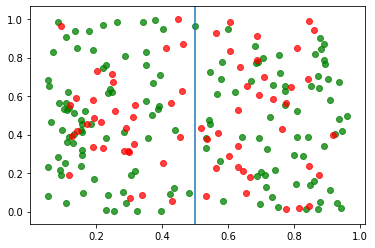

In [448]:
plt.scatter(y_probs[y_pred==y_test],np.random.rand(len(y_probs[y_pred==y_test]),1),c='g',alpha=.75);
plt.scatter(y_probs[y_pred!=y_test],np.random.rand(len(y_probs[y_pred!=y_test]),1),c='r',alpha=.75);
plt.axvline(.5);

In [465]:
results = pd.DataFrame(np.array([y_probs,y_test]).T,columns=["Prob","True"])

In [481]:
np.sum(results["True"][results.Prob > .85][results["True"] ==1])/len(results[results.Prob > .85])

0.8846153846153846

In [90]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=20))

sfs1 = SFS(pipe, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='neg_log_loss',
           cv=10)

sfs1 = sfs1.fit(X_train, y_train)

In [91]:
pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.90)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[-0.5397221942337916, -0.885746270957144, -0.5...",-0.64381,"(seed_diff,)",0.0785979,0.130096,0.0433653
2,"(0, 8)","[-0.5436282629895154, -0.5579882891862579, -0....",-0.575447,"(seed_diff, PFdiff)",0.0109388,0.0181059,0.00603531
3,"(0, 8, 9)","[-0.5498202406634568, -0.5590312988158488, -0....",-0.578126,"(seed_diff, PFdiff, rank_diff)",0.0239496,0.0396416,0.0132139
4,"(0, 2, 8, 9)","[-0.5415769313668617, -0.5869187049869687, -0....",-0.573626,"(seed_diff, com_diff, PFdiff, rank_diff)",0.0197195,0.0326398,0.0108799
5,"(0, 2, 5, 8, 9)","[-0.5665484897851779, -0.5827453815073586, -0....",-0.585129,"(seed_diff, com_diff, Astdiff, PFdiff, rank_diff)",0.0161519,0.0267348,0.0089116
6,"(0, 2, 3, 5, 8, 9)","[-0.5615973352069499, -0.5974395171427115, -0....",-0.583142,"(seed_diff, com_diff, Scorediff, Astdiff, PFdi...",0.0131112,0.0217018,0.00723393
7,"(0, 1, 2, 3, 5, 8, 9)","[-0.5402961126429796, -0.582541161143442, -0.5...",-0.578981,"(seed_diff, WP_diff, com_diff, Scorediff, Astd...",0.0165888,0.0274579,0.00915264
8,"(0, 1, 2, 3, 4, 5, 8, 9)","[-0.5577750897856066, -0.5798550045148763, -0....",-0.583483,"(seed_diff, WP_diff, com_diff, Scorediff, FGMd...",0.0175912,0.029117,0.00970567
9,"(0, 1, 2, 3, 4, 5, 6, 8, 9)","[-0.5683780981101475, -0.5828967062289784, -0....",-0.582948,"(seed_diff, WP_diff, com_diff, Scorediff, FGMd...",0.0139925,0.0231604,0.00772014
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[-0.5717150540944059, -0.614366800029339, -0.6...",-0.598,"(seed_diff, WP_diff, com_diff, Scorediff, FGMd...",0.0178224,0.0294998,0.00983326


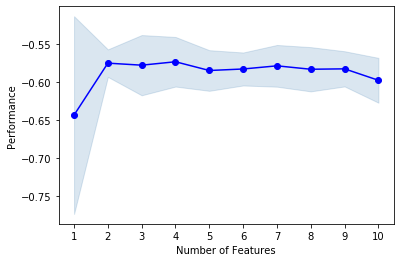

In [92]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier


pipe = make_pipeline(StandardScaler(),
                     SFS(estimator=KNeighborsClassifier(n_neighbors=5), k_features=2),
                     KNeighborsClassifier(n_neighbors=5))


pipe.fit(X_train, y_train)
print('Test Accuracy %.2f%%' % (100*pipe.score(X_test, y_test)))

Test Accuracy 65.82%


Test Accuracy 100.00%


array([[-0.0880026 ,  0.05537439, -0.01634962, -0.03091873,  0.06233482,
         0.0165093 ,  0.04204159,  0.0610759 ,  6.61070477, -6.58245464]])

array([[0.0880026 , 0.05537439, 0.01634962, 0.03091873, 0.06233482,
        0.0165093 , 0.04204159, 0.0610759 , 6.61070477, 6.58245464]])

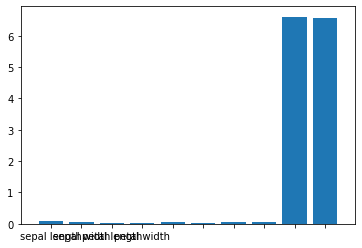